In [9]:
import spimage
import h5py
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib notebook

In [16]:
# Simulate a simple diffraction pattern
square = np.zeros((200,200))
square[90:-90,90:-90] = 1.
square_smooth = sp.ndimage.gaussian_filter(square,2)
diffraction = np.abs(np.fft.fftn(square_smooth))**2

<IPython.core.display.Javascript object>


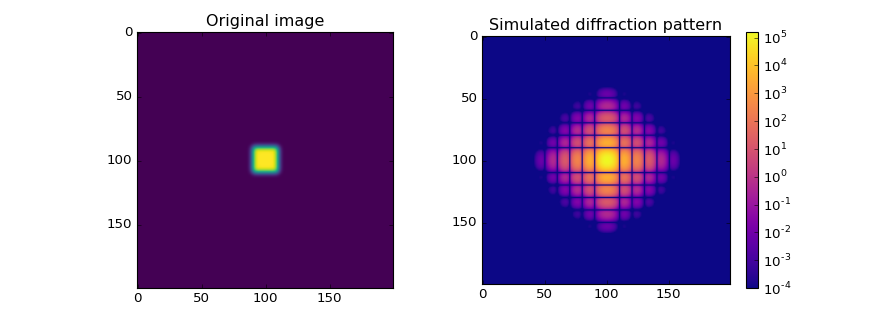

In [28]:
# Plot original image and simulated diffraction pattern
fig = plt.figure(figsize=(11,4))
ax1 = fig.add_subplot(121)
ax1.set_title('Original image')
ax1.imshow(square_smooth, cmap='viridis')
ax2 = fig.add_subplot(122)
ax2.set_title('Simulated diffraction pattern')
im2 = ax2.imshow(np.fft.fftshift(diffraction), norm=colors.LogNorm(vmin=1e-4), cmap='plasma')
fig.colorbar(im2)
plt.show()

In [46]:
# Phasing parameters
niter_hio  = 5000
niter_er   = 1000
niter_total = niter_hio + niter_er
beta = 0.9
support_size = 30.

In [47]:
# Run HIO algorithm with ER at the end
R = spimage.Reconstructor()
R.set_intensities(diffraction)
R.set_number_of_iterations(niter_total)
R.set_number_of_outputs_images(5)
R.set_number_of_outputs_scores(200)
R.set_initial_support(radius=support_size/2.)
R.set_support_algorithm("static", number_of_iterations=niter_total)
R.append_phasing_algorithm("hio",beta_init=beta, beta_final=beta, number_of_iterations=niter_hio)
R.append_phasing_algorithm("er", number_of_iterations=niter_er)
output = R.reconstruct()

In [49]:
# Collect results
recons  = output['real_space']
fourier = output['fourier_space']
support = output['support']
rerror  = output["real_error"]
ferror  = output["fourier_error"]

<IPython.core.display.Javascript object>


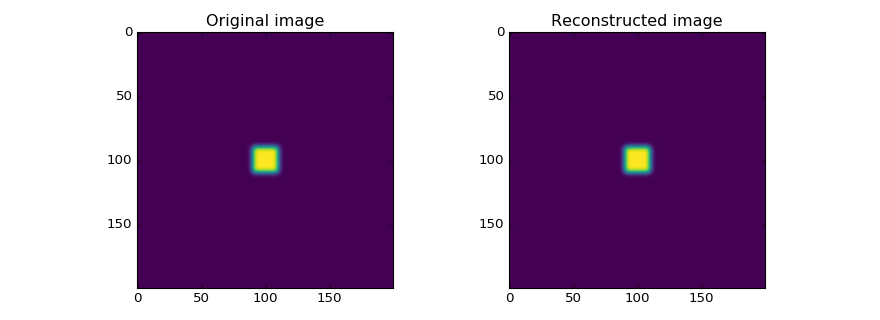

In [54]:
# Plot phasing results
fig = plt.figure(figsize=(11,4))
ax1 = fig.add_subplot(121)
ax1.set_title('Original image')
ax1.imshow(square_smooth, cmap='viridis', vmin=0, vmax=1)
ax2 = fig.add_subplot(122)
ax2.set_title('Reconstructed image')
ax2.imshow(np.abs(recons)[-1], cmap='viridis', vmin=0, vmax=1)
plt.show()